<a href="https://colab.research.google.com/github/Chang365/ESAA-25-1-assignments/blob/main/09_12_%EC%84%B8%EC%85%98_%EB%AA%A8%EB%8D%B8%ED%9B%88%EB%A0%A8_%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C_%EC%9E%A5%EC%9E%ACipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **모델 훈련 연습 문제**
___
- 출처 : 핸즈온 머신러닝 Ch04 연습문제 1, 5, 9, 10
- 개념 문제의 경우 텍스트 셀을 추가하여 정답을 적어주세요.

### **1. 수백만 개의 특성을 가진 훈련 세트에서는 어떤 선형 회귀 알고리즘을 사용할 수 있을까요?**
___


A. 수백만 개의 특성을 가진 훈련 세트에서는 계산 효율성과 메모리 사용을 고려해야하므로 **확률적 경사 하강법**이나 **미니배치 경사 하강법**을 사용할 수 있다. 정규 방정식이나 SVD 방법은 특성 개수에 따라 계산량이 폭증하므로 적합하지 않다.

### **2. 배치 경사 하강법을 사용하고 에포크마다 검증 오차를 그래프로 나타내봤습니다. 검증 오차가 일정하게 상승되고 있다면 어떤 일이 일어나고 있는 걸까요? 이 문제를 어떻게 해결할 수 있나요?**
___

A. 에포크가 진행될수록 검증 오차가 꾸준히 증가한다면 두 가지 상황을 생각할 수 있다.
1. 학습률이 지나치게 크면 최적점을 향해 수렴하지 못하고 발산할 수 있는데, 이 경우에는 훈련 오차까지 함께 증가한다.
2. 훈련 오차는 계속 줄어드는데 검증 오차만 상승한다면, 이는 모델이 훈련 데이터에 과적합되고 있음을 의미하므로 더 이상 학습을 진행하지 말아야 한다.

### **3. 릿지 회귀를 사용했을 때 훈련 오차가 검증 오차가 거의 비슷하고 둘 다 높았습니다. 이 모델에는 높은 편향이 문제인가요, 아니면 높은 분산이 문제인가요? 규제 하이퍼파라미터 $\alpha$를 증가시켜야 할까요 아니면 줄여야 할까요?**
___

A. 릿지 회귀에서 훈련 오차와 검증 오차가 비슷하고 둘 다 높다면 모델이 훈련 데이터에도 충분히 맞추지 못한다는 뜻으로 ***과소적합***되었다는 뜻이다. 높은 편향을 가졌다는 의미이므로 𝛼가 크면 가중치가 과도하게 0에 가까워져 모델이 단순해지고 편향이 커진다. 따라서 **𝛼를 줄여서** 규제를 완화해 모델이 더 유연하게 학습할 수 있도록 해야한다.

### **4. 다음과 같이 사용해야 하는 이유는?**
___
- 평범한 선형 회귀(즉, 아무런 규제가 없는 모델) 대신 릿지 회귀
- 릿지 회귀 대신 라쏘 회귀
- 라쏘 회귀 대신 엘라스틱넷

A.
1. 선형 회귀는 특성 수가 많더나 다중 공선성이 강할 때 계수가 불안정해진다. 릿지 회귀는 L2 규제를 적용해 계수의 크기를 억제하고 과적합을 방지하여 안정적인 계수 추정이 가능하기 때문이다.
2. 릿지는 모든 특성을 남겨두지만 단순히 크기만 줄인다. 라쏘는 L1 규제로 일부 계수를 0으로 만들어 자동으로 특성 선택을 수행하고 불필요한 변수를 제거해 모델을 단순화한다.
3. 라쏘는 상관성이 큰 특성들 중 하나만 선택하고 나머지는 0으로 만들어버리는 문제가 있다. 엘라스틱넷은 L1+L2 규제를 함께 사용해 라쏘의 특성 선택 능력과 릿지의 안정성으로 모두 확보할 수 있다.

### **추가) 조기 종료를 사용한 배치 경사 하강법으로 iris 데이터를 활용해 소프트맥스 회귀를 구현해보세요(사이킷런은 사용하지 마세요)**


---



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
from sklearn.datasets import load_iris

iris = load_iris()

In [2]:
X = iris["data"][:, (2, 3)]
y = iris["target"]

- 소프트맥스 회귀는 다중 클래스 분류이므로 y를 원핫 인코딩으로 변환
- 경사하강법은 스케일에 민감하므로 x를 표준화함

In [4]:
# 원핫 인코딩
def one_hot(y, num_classes):
    Y = np.zeros((len(y), num_classes))
    Y[np.arange(len(y)), y] = 1
    return Y

num_classes = len(np.unique(y))
Y = one_hot(y, num_classes)

# 표준화
X_mean, X_std = X.mean(axis=0), X.std(axis=0)
X = (X - X_mean) / X_std

In [5]:
#소프트맥스 함수
def softmax(z):
    z -= np.max(z, axis=1, keepdims=True)  # overflow 방지
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)


In [9]:
#비용함수
def cross_entropy(Y, P):
    return -np.mean(np.sum(Y * np.log(P + 1e-9), axis=1))

In [10]:
# 경사하강법 (조기종료 포함)
# 데이터 분할
from sklearn.model_selection import train_test_split  # <- 이 부분도 sklearn 쓰지 말라고 하면 np.split로 대체 가능
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

# 가중치 초기화
np.random.seed(42)
W = np.random.randn(X.shape[1], num_classes) * 0.01
b = np.zeros((1, num_classes))

# 학습 하이퍼파라미터
lr = 0.1
epochs = 5000
patience = 100
best_val_loss = float("inf")
wait = 0

train_losses, val_losses = [], []

for epoch in range(epochs):
    # forward
    logits = X_train @ W + b
    P = softmax(logits)
    loss = cross_entropy(Y_train, P)

    # gradient
    grad_W = X_train.T @ (P - Y_train) / len(X_train)
    grad_b = np.mean(P - Y_train, axis=0, keepdims=True)

    # update
    W -= lr * grad_W
    b -= lr * grad_b

    # validation
    val_logits = X_val @ W + b
    P_val = softmax(val_logits)
    val_loss = cross_entropy(Y_val, P_val)

    train_losses.append(loss)
    val_losses.append(val_loss)

    # early stopping
    if val_loss < best_val_loss - 1e-6:
        best_val_loss = val_loss
        best_W, best_b = W.copy(), b.copy()
        wait = 0
    else:
        wait += 1
        if wait >= patience:
            print(f"Early stopping at epoch {epoch}")
            break

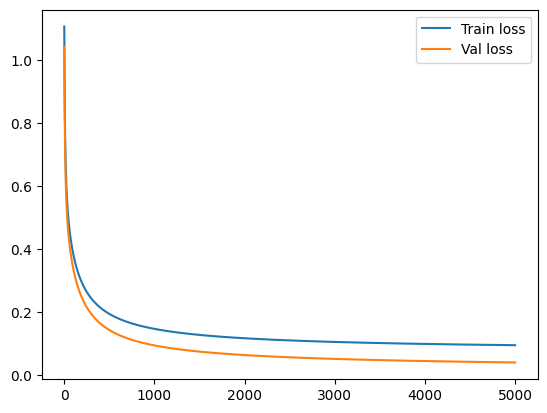

Train acc: 0.95
Val acc: 1.0


In [11]:
# 결과확인

import matplotlib.pyplot as plt

plt.plot(train_losses, label="Train loss")
plt.plot(val_losses, label="Val loss")
plt.legend()
plt.show()

# 최종 정확도
def accuracy(X, Y, W, b):
    P = softmax(X @ W + b)
    return np.mean(np.argmax(P, axis=1) == np.argmax(Y, axis=1))

print("Train acc:", accuracy(X_train, Y_train, best_W, best_b))
print("Val acc:", accuracy(X_val, Y_val, best_W, best_b))
